In [1]:
import os
import pandas as pd
from constants import *
import numpy as np
import matplotlib.pyplot as plt
from stroke import *

In [2]:
pathToCVSData = '/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/dataSetCSV'

In [3]:
def removePeaks(stroke, dataColumn, windowSize):
    stroke.data[dataColumn] = savgol_filter(stroke.data[dataColumn], min(len(stroke.data), windowSize), 3) 

In [4]:
def interpolate(stroke):
    stroke.data[stroke.data == 0.0] = np.nan
    stroke.data.interpolate(method='linear', inplace=True)

In [9]:
listStrokesTrain = []
listStrokesValidation = []

for folder in sorted(os.listdir(pathToCVSData)):
    pathToFolder = os.path.join(pathToCVSData, folder)
    if folder == "train":
        for subfolder in sorted(os.listdir(pathToFolder)):
            if subfolder in SELECTED_TRICKS:
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                        stroke = Stroke(data=strokeData, label=subfolder, id=file)
                        listStrokesTrain.append(stroke)

    if folder == "validation":
        for subfolder in sorted(os.listdir(pathToFolder)):
            if subfolder in SELECTED_TRICKS:
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                        stroke = Stroke(data=strokeData, label=subfolder, id=file)
                        listStrokesValidation.append(stroke)

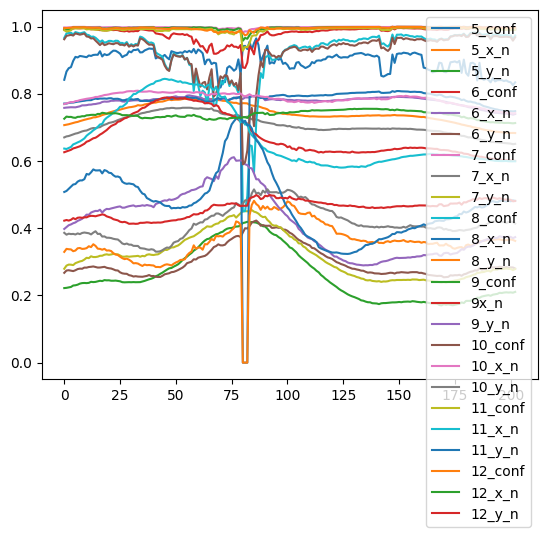

In [6]:
listStrokesTrain[14].plotStroke(SELECTED_FEATURES_PLOT)

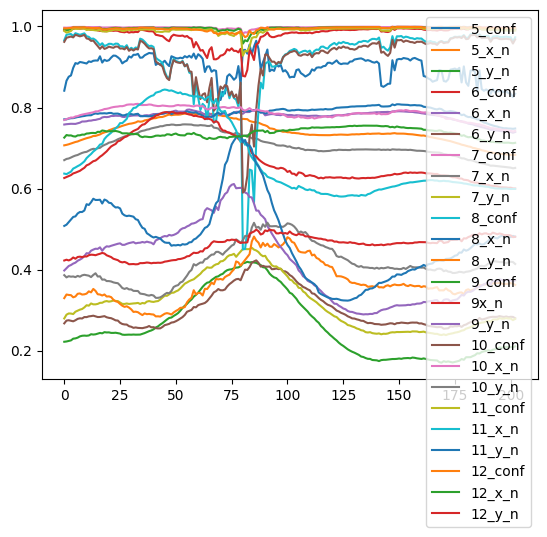

In [7]:
interpolate(listStrokesTrain[14])
listStrokesTrain[14].plotStroke(SELECTED_FEATURES_PLOT)

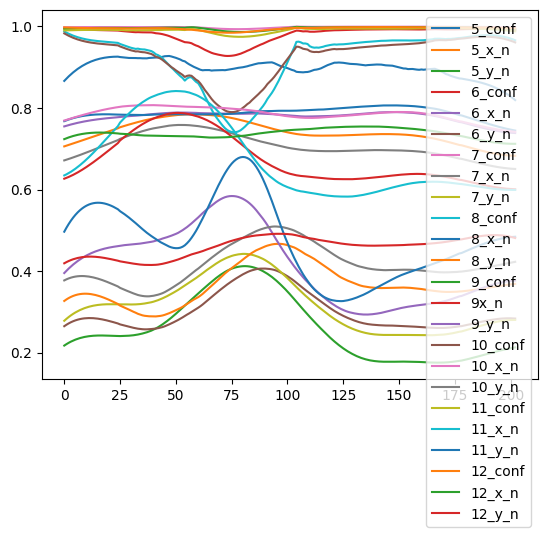

In [8]:
for c in SELECTED_FEATURES_PLOT:
    removePeaks(listStrokesTrain[14], c, 50)
listStrokesTrain[14].plotStroke(SELECTED_FEATURES_PLOT)

In [10]:
for s in listStrokesTrain:
    interpolate(s)
    for c in SELECTED_FEATURES_PLOT:
        removePeaks(s, c, 50)

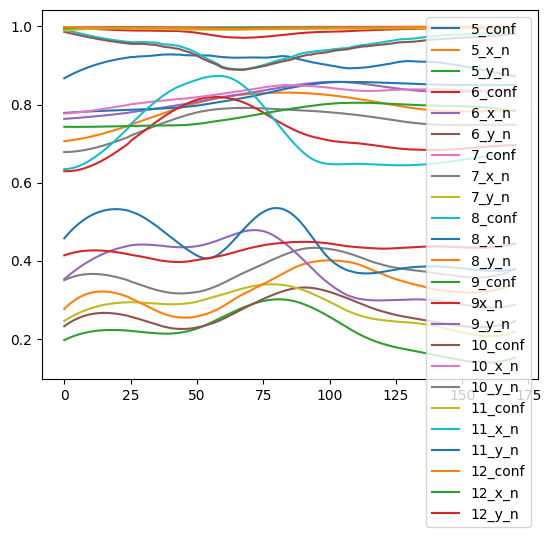

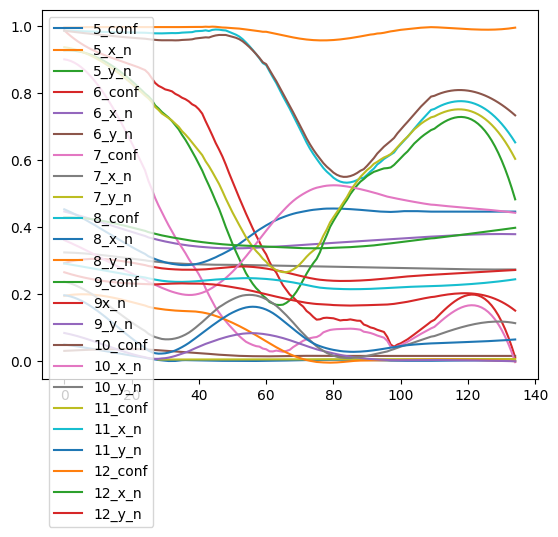

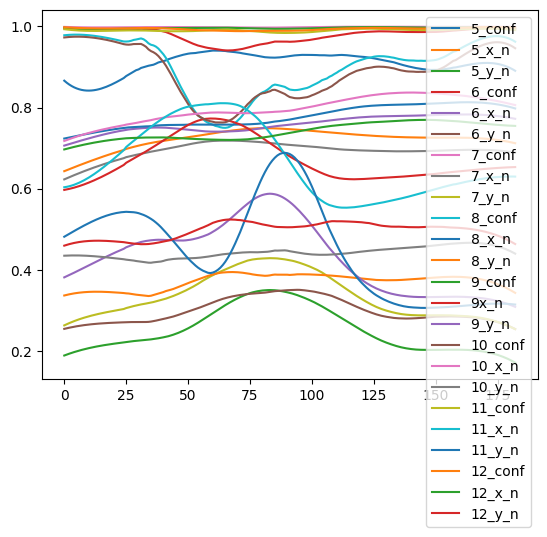

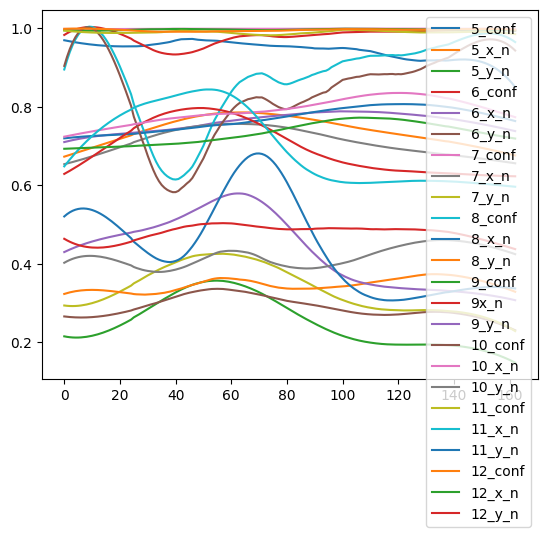

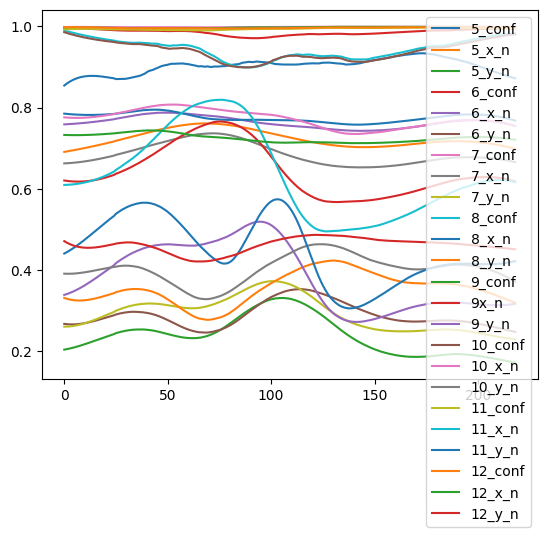

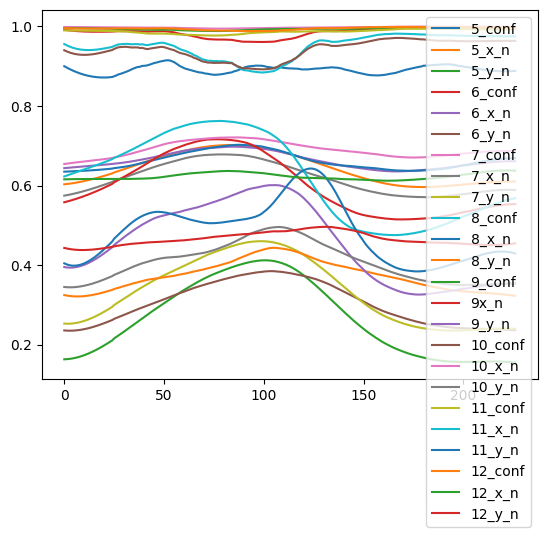

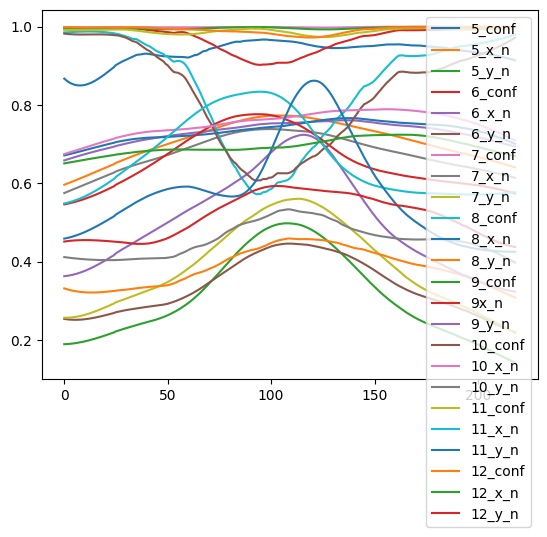

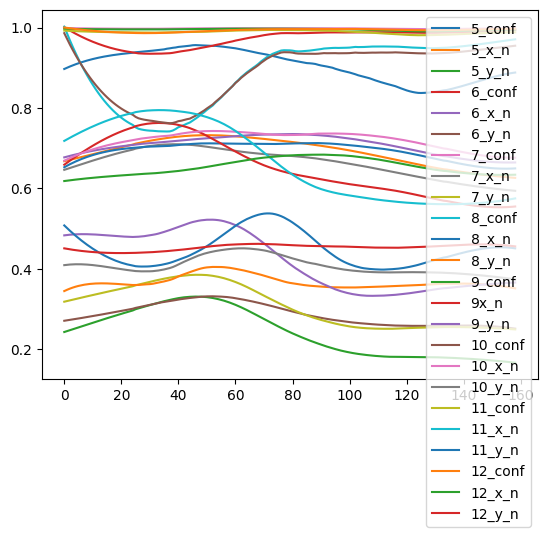

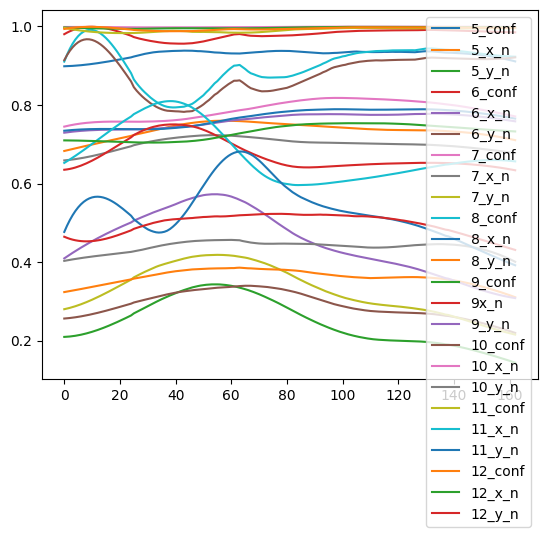

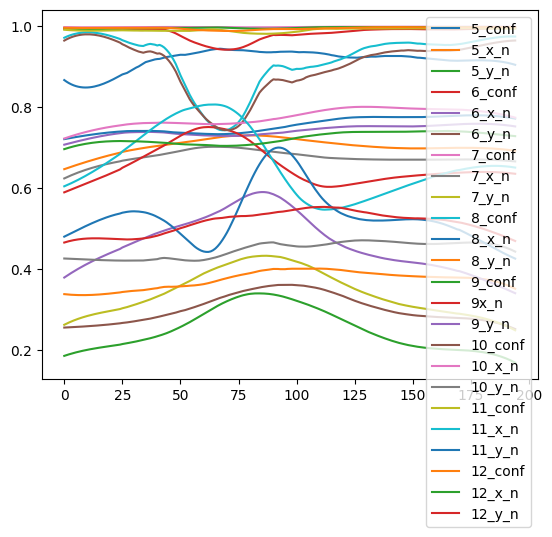

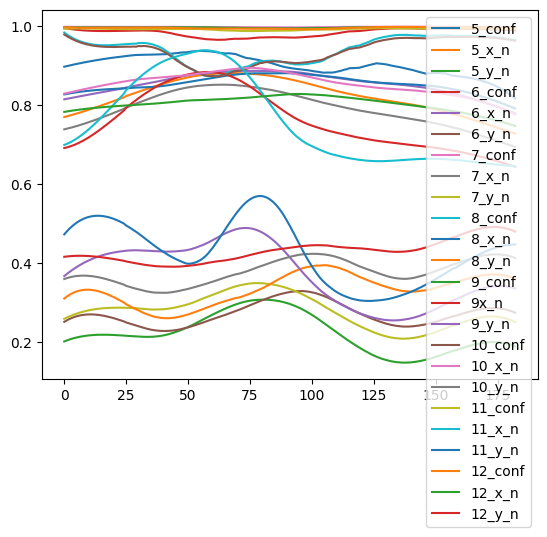

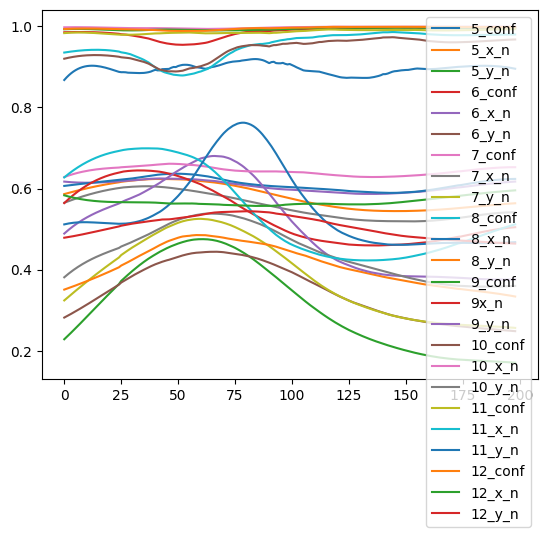

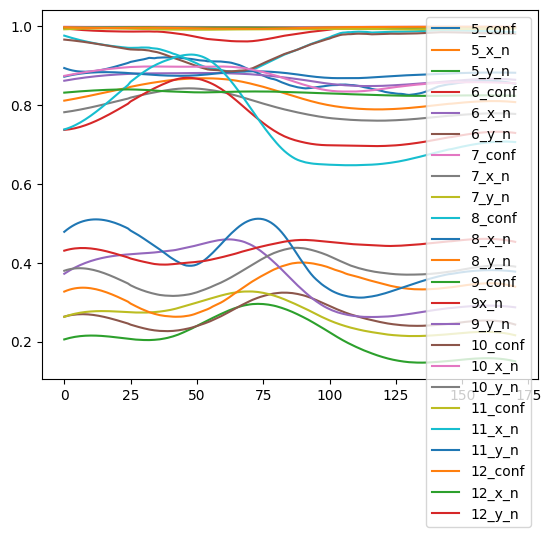

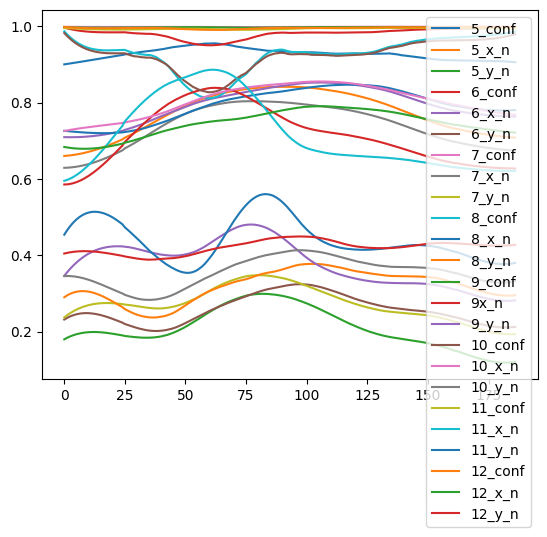

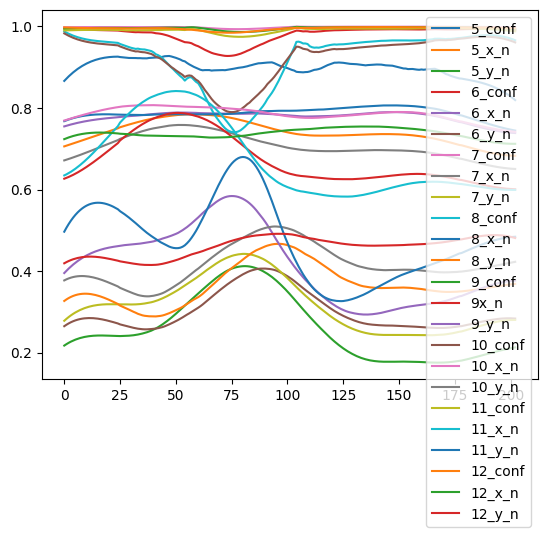

In [11]:
for s in listStrokesTrain[:15]:
    s.plotStroke(SELECTED_FEATURES_PLOT)